# Lista 3 - Redes Neurais

## Questão 1

O algoritmo de gradiente descendente, que é usado para treinar redes neurais são determinísticos e ele pode ser escrito em termos de derivadas parciais

exemplo: $ w_{n+1}^{i} = w_n^{i} - \alpha \frac{\delta J}{\delta w} $

isso para cada um dos meus pesos $ w^{i} $, se todos forem inicializados com o mesmo peso, todos teram o mesmo impacto no resultado, logo mudaram na mesma quantidade. Dessa forma, cada um dos neurônios da minha rede neural irão desempenhar o mesmo papel e serão redudantes

<br>

glossário:

$ \alpha $ : Learning Rate

$ J $ : Função de perca

## Questão 2

Se as minhas ativações na minha rede MLP forem todas lineares, a separação de cada um dos dados serão hiperplanos lineares e dessa forma, dados mais complexos e sem a característica lineares não serem aprendidos da forma correta e a minha rede MLP irá gerar resultados insatisfatórios

## Questão 3

Letra A)

Os neurônios na camada convolucional de uma CNN pode se conectar a uma região limitada da acamada anterior, isso é similar à esparsidade de uma MLP. Além disso, quando utilizamos o mesmo kernel em toda a imagem, há com isso o compartilhamento de pesos que se assemelha a neurônios com pesos compartilhados em uma MLP

Letra B)

A aplicação do mesmo kernel em diferentes partes da imagem dá a nossa rede uma propriedade muito importante que é a invariância à translação das CNNs. Ou seja, podemos encontrar padrões específicos independente da posição inical da imagem

Letra C)

O compartilhamento de pesos em CNNs se refere à utilização do mesmo kernel, com seus pesos aprendidos durante o treinamento, em toda a extensão da imagem. Em ve de termos pesos únicos para cada uma das conexões entre pixeç e neurônios, o kernel "desliza" pela imagem, extraindo suas características em diferentes posições e usando o mesmo conjunto de pesos

## Questão 4

## Questão 5

Matriz de entrada:

$$
X =
\begin{bmatrix}
1 & 2 & 3 & 4 & 5 \\
1 & 1 & 1 & 1 & 1 \\
0 & 1 & -2 & 1 & -1 \\
0 & 0 & 0 & -2 & 1 \\
1 & 2 & 2 & 0 & 0
\end{bmatrix} $$

<br>

Kernel:
$$
K =
\begin{bmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
0 & 1 & 0
\end{bmatrix}$$

Seja $Y$ a matriz resultante da convolução com um stride(2,2) sem padding.

O primeiro elemento de $Y$ é calculado como:

<br>

$Y_{11} = (1 \times 1) + (0 \times 2) + (0 \times 3) + (1 \times 1) + (0 \times 1) + (0 \times 1) + (0 \times 0) + (1 \times 1) + (0 \times -2) = 2$

O segundo elemento da primeira linha de Y é calculado como:

<br>

$Y_{12} = (1 \times 3) + (0 \times 4) + (0 \times 5) + (1 \times 1) + (0 \times 1) + (0 \times 1) + (0 \times -2) + (1 \times 1) + (0 \times -1) = 4
$

Os demais elementos são zero, pois ao deslizarmos a matriz $K$ na Matriz $X$ pelo stride (2,2) a gente "saí" da matriz principal

Então a matriz final é:

$$
Y =
\begin{bmatrix}
2 & 4 \\
0 & 0  
\end{bmatrix}$$


## Questão 6

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from torchvision.utils import make_grid

from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.models import resnet18

In [ ]:
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())

Files already downloaded and verified


In [ ]:
dataset, dataset.classes

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: data/
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'])

torch.Size([3, 32, 32])
Label (numeric): 6
Label (textual): frog


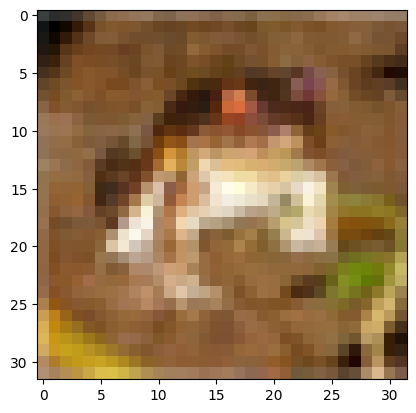

In [ ]:
img, label = dataset[0]
img_shape = img.shape
print(img_shape)

img, label = dataset[0]
plt.imshow(img.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', dataset.classes[label])

### Letra A

Número de imagens no dataset: 50.000

Dimensões de cada imagem: 3x32x32 -> 3 representa as cores RGB e a imagem é 32x32

Lista de classes presentes: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog,Horse, Ship, Truck

### Letra B

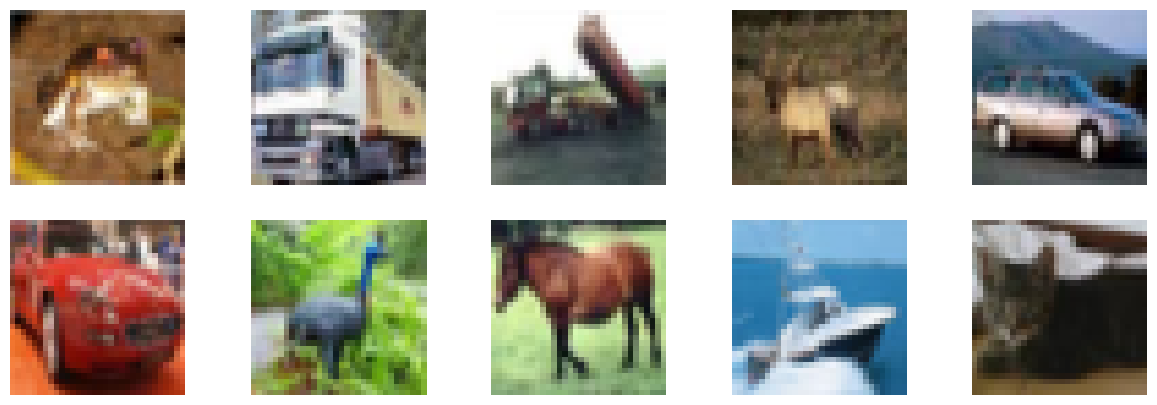

In [ ]:
# Plotando as 10 primeiras imagens

plt.figure(figsize=(15, 5))
for i in range(10):
    img, label = dataset[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(img.permute((1, 2, 0)))
    plt.axis("off")
plt.show()

### Letra C

In [ ]:
# Analisando as imagens do dataset

print(dataset[0])

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0

In [ ]:
#Código para verificar o maior e menor valor de pixel da imagem

max_values = []
min_values = []

for img, _ in dataset:
  max_value = torch.max(img)
  min_value = torch.min(img)
  max_values.append(max_value.item())
  min_values.append(min_value.item())

np.max(max_values), np.min(min_values)

(1.0, 0.0)

O dataset CIFAR10 que foi importado do torchvision.datasets foi reescalonada para o intervalo [0,1] ao usar a transformação ToTensor()

### Letra D

In [ ]:
# Dispositivo (CPU ou GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dividir o conjunto de dados em treino e validação
train_size = 40000
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
batch_size_train = 64
batch_size_val   = 1000

# Carregar os dados em DataLoaders
trainloader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
testloader = DataLoader(val_dataset, batch_size=batch_size_val, shuffle=True)

In [ ]:
# modelos CNN
class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        #Camadas convolucionais
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.flatten(x)

        #Camadas MLP
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # Output

        return x

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):

        #Camadas convolucionais
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        #Camadas MLP
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # Output

        return x

class CNN4(nn.Module):
    def __init__(self):
        super(CNN4, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):

        #Camadas Convolucionais
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.flatten(x)

        #Camadas MLP
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [ ]:
# Lista de modelos
models = [
    CNN2(),
    CNN3(),
    CNN4()]

accuracies = {model: [] for model in models}
names = {models[0]: "CNN 2 Camadas", models[1]: "CNN 3 Camadas", models[2]: "CNN 4 Camadas"}

# Loop de Treinamento e Avaliação
for model in models:
    print(" ")
    print("Modelo", f"{names[model]}")
    print(" ")
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    opt = optim.Adam(model.parameters(), lr=0.001)

    print("Fase de Treino")
    for epoch in range(10):
        running_loss = 0.0

        # Treinamento
        model.train()
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            opt.step()
            opt.zero_grad()

            running_loss += loss.item()
            if i % 200 == 199:
                print('[%d, %5d] perda: %.3f' %
                      (epoch + 1, i + 1, running_loss / 200))
                running_loss = 0.0

        # Avaliação do modelo no conjunto de treino
        model.eval()
        correct_train = 0
        total_train = 0

        with torch.no_grad():
            for data in trainloader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total_train += labels.size(0)
                correct_train += (predicted == labels).sum().item()

        acuracia_treino = 100 * correct_train / total_train

        # Avaliação do modelo no conjunto de teste
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for data in testloader:
                images, labels = data[0].to(device), data[1].to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        acuracia_teste = 100 * correct_test / total_test

        print(f'Época {epoch+1} - Acurácia no conjunto de treino: {acuracia_treino:.2f}%')
        print(f'Época {epoch+1} - Acurácia no conjunto de teste: {acuracia_teste:.2f}%')
        print(" ")

    print(f"Terminou o treinamento do modelo: {model.__class__.__name__}")
    print("-" * 50)

 
Modelo CNN 2 Camadas
 
Fase de Treino
[1,   200] perda: 1.892
[1,   400] perda: 1.496
[1,   600] perda: 1.326
Época 1 - Acurácia no conjunto de treino: 56.24%
Época 1 - Acurácia no conjunto de teste: 55.19%
 
[2,   200] perda: 1.186
[2,   400] perda: 1.121
[2,   600] perda: 1.064
Época 2 - Acurácia no conjunto de treino: 67.80%
Época 2 - Acurácia no conjunto de teste: 64.09%
 
[3,   200] perda: 0.937
[3,   400] perda: 0.931
[3,   600] perda: 0.898
Época 3 - Acurácia no conjunto de treino: 74.66%
Época 3 - Acurácia no conjunto de teste: 67.70%
 
[4,   200] perda: 0.764
[4,   400] perda: 0.759
[4,   600] perda: 0.753
Época 4 - Acurácia no conjunto de treino: 79.31%
Época 4 - Acurácia no conjunto de teste: 68.48%
 
[5,   200] perda: 0.580
[5,   400] perda: 0.603
[5,   600] perda: 0.620
Época 5 - Acurácia no conjunto de treino: 85.37%
Época 5 - Acurácia no conjunto de teste: 70.64%
 
[6,   200] perda: 0.426
[6,   400] perda: 0.469
[6,   600] perda: 0.480
Época 6 - Acurácia no conjunto de

Em todos os modelos usamos o batch_size de 64 no trainloader e o batch_size de 1000 no testloader.

Fixamos o learning Rate em 0.001 em todos os modelos também.

<br>

Estrutura de cada um dos modelos:

<br>

Modelo CNN2:

* Conv1: 32 unidades latentes, função de ativação ReLU
* Conv2: 64 unidades latentes, função de ativação ReLU
* FC1: 1024 unidades latentes, função de ativação ReLU
* FC2: 512 unidades latentes, função de ativação ReLU
* FC3: 256 unidades latentes, função de ativação ReLU
* FC4: 10 unidades latentes, sem função de ativação (camada de saída)

<br>

Modelo CNN3:

* Conv1: 32 unidades latentes, função de ativação ReLU
* Conv2: 64 unidades latentes, função de ativação ReLU
* Conv3: 128 unidades latentes, função de ativação ReLU
* FC1: 1024 unidades latentes, função de ativação ReLU
* FC2: 512 unidades latentes, função de ativação ReLU
* FC3: 256 unidades latentes, função de ativação ReLU
* FC4: 10 unidades latentes, sem função de ativação (camada de saída)

<br>

Modelo CNN4:

* Conv1: 32 unidades latentes, função de ativação ReLU
* Conv2: 64 unidades latentes, função de ativação ReLU
* Conv3: 128 unidades latentes, função de ativação ReLU
* Conv4: 256 unidades latentes, função de ativação ReLU
* FC1: 512 unidades latentes, função de ativação ReLU
* FC2: 256 unidades latentes, função de ativação ReLU
* FC3: 128 unidades latentes, função de ativação ReLU
* FC4: 10 unidades latentes, sem função de ativação (camada de saída)



### Letra E

O melhor modelo é o CNN3.

Depois de +/- 5 épocas todos os modelos retornam uma acurácia próxima de 90% no conjunto de treino, mas no conjunto de validação fica próximo de 70% de acurácia.

### Letra F

In [ ]:
class CNN3_Dropout(nn.Module):
    def __init__(self):
        super(CNN3_Dropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(p=0.5)  # Dropout com 50% de probabilidade

    def forward(self, x):

        # Camadas convolucionais
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Camadas MLP com Dropout
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # Aplicando dropout após a primeira camada totalmente conectada
        x = F.relu(self.fc2(x))
        x = self.dropout(x)  # Aplicando dropout após a segunda camada totalmente conectada
        x = F.relu(self.fc3(x))
        x = self.dropout(x)  # Aplicando dropout após a terceira camada totalmente conectada
        x = self.fc4(x)  # Output

        return x

In [ ]:
print("CNN3 com Dropout")
print(" ")

model = CNN3_Dropout()

model = model.to(device)
criterion = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr=0.001)

print("Fase de Treino")
for epoch in range(10):
    running_loss = 0.0

    # Treinamento
    model.train()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        opt.step()
        opt.zero_grad()

        running_loss += loss.item()
        if i % 200 == 199:
            print('[%d, %5d] perda: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

    # Avaliação do modelo no conjunto de treino
    model.eval()
    correct_train = 0
    total_train = 0

    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

    acuracia_treino = 100 * correct_train / total_train

    # Avaliação do modelo no conjunto de teste
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    acuracia_teste = 100 * correct_test / total_test

    print(f'Época {epoch+1} - Acurácia no conjunto de treino: {acuracia_treino:.2f}%')
    print(f'Época {epoch+1} - Acurácia no conjunto de teste: {acuracia_teste:.2f}%')
    print(" ")

print(f"Terminou o treinamento do modelo: {model.__class__.__name__}")
print("-" * 50)

CNN3 com Dropout
 
Fase de Treino
[1,   200] perda: 2.265
[1,   400] perda: 1.935
[1,   600] perda: 1.692
Época 1 - Acurácia no conjunto de treino: 43.51%
Época 1 - Acurácia no conjunto de teste: 43.03%
 
[2,   200] perda: 1.545
[2,   400] perda: 1.449
[2,   600] perda: 1.389
Época 2 - Acurácia no conjunto de treino: 54.01%
Época 2 - Acurácia no conjunto de teste: 53.20%
 
[3,   200] perda: 1.305
[3,   400] perda: 1.302
[3,   600] perda: 1.237
Época 3 - Acurácia no conjunto de treino: 60.22%
Época 3 - Acurácia no conjunto de teste: 58.74%
 
[4,   200] perda: 1.171
[4,   400] perda: 1.150
[4,   600] perda: 1.144
Época 4 - Acurácia no conjunto de treino: 64.77%
Época 4 - Acurácia no conjunto de teste: 61.71%
 
[5,   200] perda: 1.083
[5,   400] perda: 1.070
[5,   600] perda: 1.074
Época 5 - Acurácia no conjunto de treino: 67.49%
Época 5 - Acurácia no conjunto de teste: 64.33%
 
[6,   200] perda: 1.004
[6,   400] perda: 1.009
[6,   600] perda: 0.997
Época 6 - Acurácia no conjunto de trein

Usando o Dropout com p = 0.5 não tivemos uma melhoria na acurácia de validação. Também não notei nenhum ganho a mais com o Dropout.